<a href="https://colab.research.google.com/github/nildodnjunior/mestrado_comp_ifes_ml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [43]:
set(y)

{0, 1, 2}

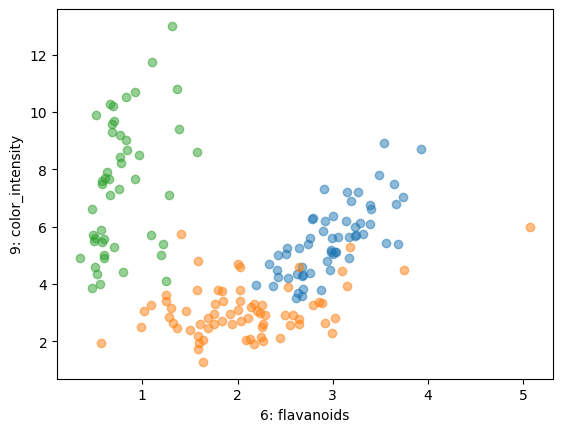

In [44]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [45]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [46]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [47]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.13964081e-04, 4.72784042e-04, 8.15391541e-05, 7.86781311e-05,
        7.53402710e-05]),
 'score_time': array([0.00223732, 0.00196886, 0.00191164, 0.00183415, 0.00182509]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  2,  2],
       [ 2, 19,  3],
       [ 0,  5,  5]])

In [49]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7007017543859649

In [50]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [51]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.07765198e-04, 1.10149384e-04, 1.32322311e-04, 9.87052917e-05,
        1.08957291e-04]),
 'score_time': array([0.00640702, 0.00731826, 0.00459409, 0.00420451, 0.00485682]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [52]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.15156174e-04, 1.07765198e-04, 1.00374222e-04, 1.09672546e-04,
        9.89437103e-05]),
 'score_time': array([0.00648904, 0.00507355, 0.0051856 , 0.00517917, 0.00543523]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.08480453e-04, 1.13725662e-04, 1.23262405e-04, 1.03473663e-04,
        1.03473663e-04, 1.03712082e-04, 1.15633011e-04, 1.09195709e-04,
        1.22070312e-04, 1.02996826e-04, 9.72747803e-05, 9.89437103e-05,
        9.58442688e-05, 1.15633011e-04, 9.72747803e-05, 9.94205475e-05,
        9.75131989e-05, 1.07288361e-04, 9.87052917e-05, 1.06811523e-04,
        1.07526779e-04, 1.01804733e-04, 9.32216644e-05, 1.09910965e-04,
        1.01804733e-04, 1.00851059e-04, 9.96589661e-05, 1.01089478e-04,
        1.06573105e-04, 9.51290131e-05, 1.00374222e-04, 1.11818314e-04,
        9.48905945e-05, 9.94205475e-05, 1.06811523e-04, 1.19209290e-04,
        9.84668732e-05, 1.06334686e-04, 9.58442688e-05, 9.91821289e-05,
        1.13487244e-04, 9.70363617e-05, 1.00374222e-04, 1.01327896e-04,
        1.03712082e-04, 1.00851059e-04, 9.96589661e-05, 1.03950500e-04,
        1.02758408e-04, 9.77516174e-05]),
 'score_time': array([0.00992632, 0.00924706, 0.00928426, 0.00723124, 0.0073123 ,


In [54]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [55]:
intercepts = modelo.intercept_
intercepts

array([-105.,  114.,   19.])

In [56]:
coefs = modelo.coef_[:,[6,9]]
coefs

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

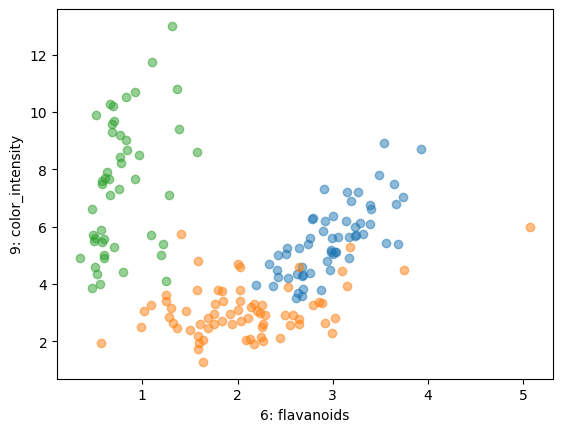

In [57]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

###Plotando hiperplanos separadores

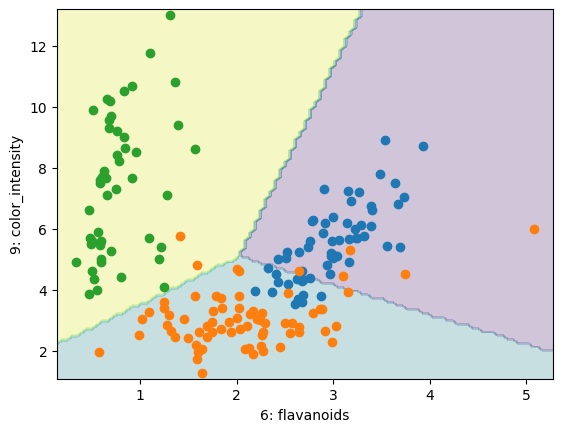

In [60]:
modelo.fit(X[:,[6,9]], y)

x6s = np.linspace(np.min(X[:, 6]) - 0.2, np.max(X[:, 6]) + 0.2, 100)
x9s = np.linspace(np.min(X[:, 9]) - 0.2, np.max(X[:, 9]) + 0.2, 100)
x6, x9 = np.meshgrid(x6s, x9s)

Xdec = np.c_[x6.ravel(), x9.ravel()]

ypred = modelo.predict(Xdec)
plt.contourf(x6, x9, ypred.reshape(x6.shape), alpha=0.25)

for k in set(y):
    plt.plot(X[:,6][y==k], X[:,9][y==k], 'o')

plt.xlabel(f"{6}: {dataset.feature_names[6]}")
plt.ylabel(f"{9}: {dataset.feature_names[9]}")

plt.show()